## Config the environment

#### Installing libraries:

1. Tensorflow
2. Keras
3. matplotlib
4. numpy

In [1]:
!pip install -U tensorflow keras matplotlib

#### Disabling the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

the Fashion MNIST counts with 70000 of images splided in 10 types of clothes and accessories:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [3]:
from tensorflow.keras.datasets import fashion_mnist

# Get the dataset
((X_train_ori, y_train_ori), (X_test_ori, y_test_ori)) = fashion_mnist.load_data()

# Create a reference for the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print a summary aboout the train dataset
print("Train shape:", X_train_ori.shape)
print("Test shape:", X_test_ori.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


## Plot some images

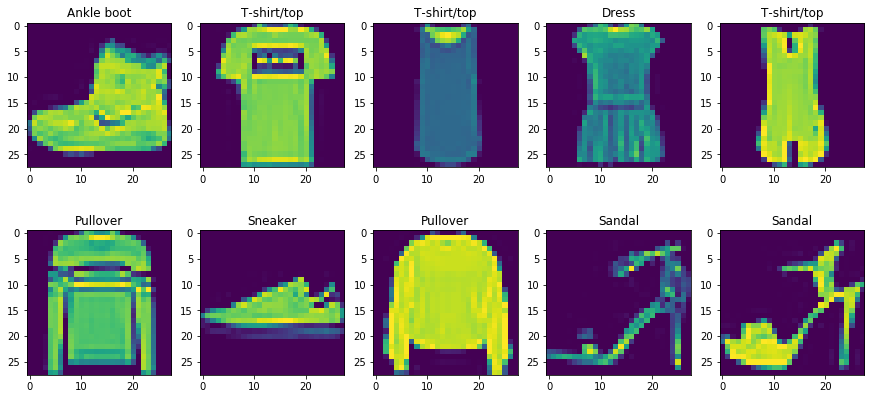

In [5]:
import matplotlib.pyplot as plt

# Configure the size of the image
plt.figure(figsize=(15,7))

# Plot the images
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train_ori[i])
  plt.title(labels[y_train_ori[i]])

plt.show()

## Normalize the dataset

- Reshape the image vector from 2D images to 3D with this distribuition (inputs size, height, columns, colors). That reshape basicly add one more dimesion corresponding the color, just is a pattern,.
- Rescale the value of each one pixel. THe variace between 0 and 255 probably will incresse too much the value of the weight, making the train more difficult. To solve that problem we rescale into 0 and 1.
- Tranform the result to categorial. The Fashion MNIST split the classes of the clothes using values between 0 and 9, but isn't scalar problem, so it's necessary tranform into a vector with mutiples results.
E.g.: Case the value is `4` the result will be `[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]`

In [9]:
from keras.utils import np_utils

# Reshape to 4D array (inputs size, height, columns, colors)
X_train = X_train_ori.reshape(X_train_ori.shape[0], 28, 28, 1)
# Normalize the value from 0 to 1.0
X_train = X_train.astype('float32')
X_train/=255

# Reshape to 4D array (inputs size, height, columns, colors)
X_test = X_test_ori.reshape(X_test_ori.shape[0], 28, 28, 1)
# Normalize the value from 0 to 1.0
X_test = X_test.astype('float32')
X_test/=255

# Transforma in categorical results
y_train = np_utils.to_categorical(y_train_ori)
y_test= np_utils.to_categorical(y_test_ori)

Using TensorFlow backend.


<br>
<br>

# Building a Deep Neural Network

The goals is make a Deep Neural Network with that features

![alt text](docs/dnn.png "Deep Neural Network")

### Configs

In [13]:
NUM_EPOCHS = 30
BATCH_SIZE = 500
OUTPUT_SIZE = len(labels)

### Create the model

In [14]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization

# Create a network
model = Sequential()

# ====================
#     First Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))
# ====================

# ====================
#    Second Layer
model.add(Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))
# ====================

# ====================
#      Flatten
model.add(Flatten())
# ===================

# ====================
#  First Dense Layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
# ====================

# ====================
#  Final Dense Layer
model.add(Dense(OUTPUT_SIZE))
model.add(Activation('softmax'))
# ====================

# Define the optmizer and loss function
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['acc'])

### Training

In [15]:
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 196us/step - loss: 0.6269 - acc: 0.7941 - val_loss: 1.9507 - val_acc: 0.3405
Epoch 2/30
60000/60000 [==============================] - 11s 178us/step - loss: 0.3657 - acc: 0.8666 - val_loss: 1.4607 - val_acc: 0.6134
Epoch 3/30
60000/60000 [==============================] - 11s 179us/step - loss: 0.3051 - acc: 0.8871 - val_loss: 0.8286 - val_acc: 0.7188
Epoch 4/30
60000/60000 [==============================] - 11s 179us/step - loss: 0.2658 - acc: 0.9023 - val_loss: 0.4097 - val_acc: 0.8460
Epoch 5/30
60000/60000 [==============================] - 11s 180us/step - loss: 0.2441 - acc: 0.9095 - val_loss: 0.2443 - val_acc: 0.9112
Epoch 6/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.2221 - acc: 0.9180 - val_loss: 0.2292 - val_acc: 0.9166
Epoch 7/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.2065 - acc: 0.9230 - val_loss: 0.

### Accuracy

<Figure size 1080x360 with 0 Axes>

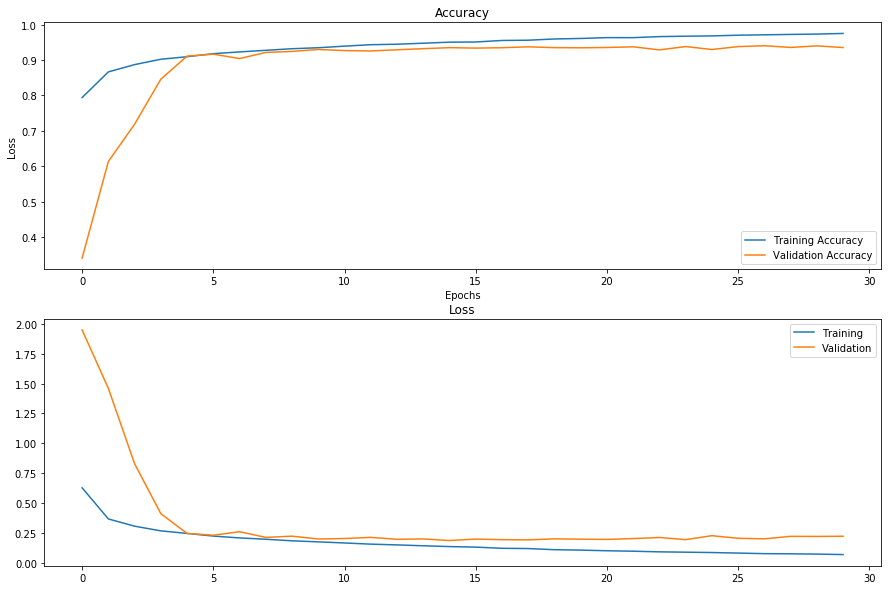

In [41]:
plt.figure(figsize=(15,5))

_, axis = plt.subplots(2, 1, figsize=(15,10))

axis[0].set_title('Accuracy')
axis[0].plot(history.history['acc'], label="Training")
axis[0].plot(history.history['val_acc'], label="Validation")
axis[0].legend(['Training Accuracy', 'Validation Accuracy'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Accuracy')

axis[1].set_title('Loss')
axis[1].plot(history.history['loss'], label="Training")
axis[1].plot(history.history['val_loss'], label="Validation")
axis[1].legend(['Training', 'Validation'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')

plt.show()

In [59]:
from IPython.display import display, HTML

loss, acc = model.evaluate(X_test, y_test)

display(HTML(f"<h2>Loss (Test): {round(loss, 2)}</h2>"))
display(HTML(f"<h2>Accuracy (Test): {round(acc * 100, 2)}</h2>"))

10000/10000 [==============================] - 2s 193us/step


<br>
<br>

## Saving the model

In [60]:
model.save('./backups/model.h5')